In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as t
import numpy as np
from tqdm import tqdm

In [45]:
IID_to_income_helper = {}
IID_to_income = {}
IID_to_income_lic = {}
IID_to_employee_num = {}
IID_to_taxes = {}
IID_to_salary = {}
total = {}

column1 = 'income'
column2 = 'income_lic'
column3 = 'employee_num'
column4 = 'taxes'
column5 = 'salary'
df = pd.read_csv('fns_for_model.csv', delimiter=';')
    
df[column4] = df["taxesProfit"] + df["taxesVAT"] + df["taxesEmplSal"]
df[column5] = df['fot'] / df[column3]

In [46]:
df

,IID,year,quarter,employee_num,fot,income,income_lic,taxesProfit,taxesVAT,taxesEmplSal,insurance,isIT,isSpecialTaxRegime_insurance,isSpecialTaxRegime_profit,taxType,businessSize,isIP,taxes,salary
0,2141,2019,1,151.333333,6.042653e+07,39003298.0,13650750.0,14022,1229036,7860574,17010437.67,1,0,0,1,2,0,9103632,3.992943e+05
1,2141,2019,2,157.000000,1.224405e+08,107656862.0,21120896.0,30211,7023881,14738957,33958990.80,1,0,0,1,2,0,21793049,7.798755e+05
2,2141,2019,3,170.666667,1.836989e+08,189147659.0,2930912.0,64047,7651800,23893638,48929790.63,1,0,0,1,2,0,31609485,1.076361e+06
3,2141,2019,4,172.000000,2.495187e+08,431550201.0,77639346.0,2105889,30629631,32213924,62660822.03,1,0,0,1,2,0,64949444,1.450690e+06
4,2141,2020,1,168.666667,6.427368e+07,138196601.0,30673842.0,0,19735329,8376352,19181688.37,1,0,0,1,2,0,28111681,3.810692e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412528,100228937383,2021,2,1.000000,8.210526e+04,0.0,0.0,0,0,2600,20306.78,0,0,0,0,0,1,2600,8.210526e+04
412529,100228937383,2021,3,1.666667,1.739234e+05,0.0,0.0,0,0,8074,43527.43,0,0,0,0,0,1,8074,1.043541e+05
412530,100229077630,2020,3,0.000000,0.000000e+00,220842.0,0.0,0,36807,0,0.00,0,0,0,2,1,1,36807,NaN
412531,100229077630,2020,4,0.000000,0.000000e+00,331666.0,0.0,0,18471,0,0.00,0,0,0,2,1,1,18471,NaN


In [47]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [48]:
def one_quarter(column, year, quarter):
    
    df_income = df[(df['year'] == year) & (df['quarter'] == quarter)]
    income_sum = df_income[column].sum()

    df2 = df_income.sort_values(by=column, ascending=False)
    
    IID_to_income_helper = dict(zip(df2['IID'], df2[column]))
    for key in IID_to_income_helper:
        if column == column1:
            IID_to_income[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column2:
            IID_to_income_lic[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column3:
            IID_to_employee_num[(key, year, quarter)] = IID_to_income_helper[key]
        if column == column4:
            IID_to_taxes[(key, year, quarter)] = IID_to_income_helper[key]    
        if column == column5:
            IID_to_salary[(key, year, quarter)] = IID_to_income_helper[key]
        

In [49]:
year = 2021
quarter = 3
one_quarter(column=column1, year=year, quarter=quarter)
one_quarter(column=column2, year=year, quarter=quarter)
one_quarter(column=column3, year=year, quarter=quarter)
one_quarter(column=column4, year=year, quarter=quarter)
one_quarter(column=column5, year=year, quarter=quarter)

In [50]:
def result(IID_to):
    sum = 0
    for key in IID_to.keys():
        for i in range(2019, 2022):
            for j in range(1, 5):
                if (key[0], 2021, 3) in IID_to:
                    sum += IID_to[(key[0], 2021, 3)]
                    total[key[0]] = sum
        sum = 0
    dict(sorted(total.items(), key=lambda item: item[1]))
    df = pd.DataFrame(list(total.items()))
    income_sum = df[1].sum()
    i = 1
    while (df[1][0:i].sum() <= 0.2 * income_sum):
        i += 1
    print("20% count - " + str(i) + " : " + str(df[1][0:i].sum()) + " / " + str(income_sum))

    i1 = 1
    while (df[1][0:i1].sum() <= 0.8 * income_sum):
        i1 += 1
    print("80% count - " + str(i1) + " : " + str(df[1][0:i1].sum()) + " / " + str(income_sum))

    i2 = i1 + 1
    while (df[1][i1:i2].sum() <= 0.15 * income_sum):
        i2 += 1
    print("15% count - " + str(i2-i1) + " : " + str(df[1][i1:i2].sum()) + " / " + str(income_sum))

    print("5% count - " + str(df[1].size - i2))
    
    return df

In [51]:
# income
df_income = result(IID_to_income)

20% count - 17 : 8264101223388.0 / 40383234389316.0
80% count - 764 : 32309774995644.0 / 40383234389316.0
15% count - 1565 : 6058195463928.0 / 40383234389316.0
5% count - 34495


In [52]:
# income_lic
df_income_lic = result(IID_to_income_lic)

20% count - 21 : 304813593870.0 / 1454708590236.0
80% count - 729 : 1168864595256.0 / 1454708590236.0
15% count - 2599 : 218451175452.0 / 1454708590236.0
5% count - 33496


In [53]:
# taxes
df_taxes = result(IID_to_taxes)

20% count - 26 : 989083039356 / 4899762485976
80% count - 1839 : 3920068891500 / 4899762485976
15% count - 25426 : 734968883640 / 4899762485976
5% count - 9559


In [54]:
# employee_num
df_employee_num = result(IID_to_employee_num)

20% count - 75 : 3752329.0 / 18728372.5
80% count - 20827 : 14982868.5 / 18728372.5
15% count - 11825 : 2809896.0 / 18728372.5
5% count - 4172


In [55]:
# taxes and income
AA = AB = AC = BA = BB = BC = CA = CB = CC = 0
income_sum = df_income[1].sum()
taxes_sum = df_taxes[1].sum()


i1 = 0
while (df_income[1][0:i1].sum() <= 0.8 * income_sum):
    i1 += 1
j1 = 0
while(df_taxes[1][0:j1].sum() <= 0.8 * taxes_sum):
    j1 += 1

j2 = j1 + 1
while(df_taxes[1][j1:j2].sum() <= 0.15 * taxes_sum):
    j2 += 1
        
AA = len(list(set(df_income[0][0:i1]).intersection(df_taxes[0][0:j1])))
AB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][0:i1])))
AC = df_income[0][0:i1].size - AA - AB


i2 = i1 + 1
while (df_income[1][i1:i2].sum() <= 0.15 * income_sum):
    i2 += 1

BA = len(list(set(df_income[0][i1:i2]).intersection(df_taxes[0][0:j1])))
BB = len(list(set(df_taxes[0][j1:j2]).intersection(df_income[0][i1:i2])))
BC = df_income[0][i1:i2].size - BA - BB

i3 = i2 + 1
while (df_income[1][i3 - 1] != 0):
    i3 += 1
C = df_income[0][0:i3].size
end = df_income[0].size
CA = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][0:j1])))
CB = len(list(set(df_income[0][i2:end]).intersection(df_taxes[0][j1:j2])))
CC = df_income[0][i2:end].size - CA - CB

In [56]:
df_print = pd.DataFrame([[AA, AB, AC], [BA, BB, BC], [CA, CB, CC]], index=['A', 'B', 'C'], columns=['A', 'B', 'C'])
df_print

,A,B,C
A,764,0,0
B,1075,490,0
C,0,24936,9559


In [57]:
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/983169469.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/983169469.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


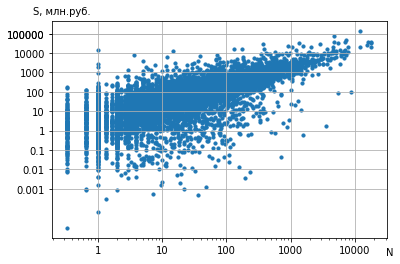

In [58]:
df1 = df[(df['year'] == 2021) & (df['quarter'] == 3) & (df[column1] != 0) & (df[column3] != 0)]
x = list(df1[column3])
y = list(df1[column1])
for i in range(len(y)):
    y[i] /= 1e6

figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x, y, s=10, color='tab:blue')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

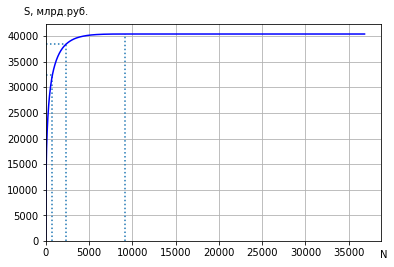

In [59]:
x = [i for i in range(0, df_income[0].size + 1)]
y = []
sum = 0
for i in range(df_income[1].size + 1):
    if i != 0:
        sum += df_income[1][i - 1] / 1e9
    y.append(sum)
    
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue', linestyles=':')
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue', linestyles=':')
plt.vlines(x = C, ymin= 0, ymax = y[C], color='tab:blue', linestyles=':')
plt.hlines(xmin = 0, xmax = A, y = y[A], color='tab:blue', linestyles=':')
plt.hlines(xmin = 0, xmax = B, y = y[B], color='tab:blue', linestyles=':')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3.eps', format='eps')

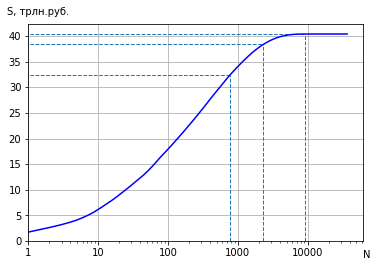

In [60]:
x = [i for i in range(1, df_income[0].size + 1)]
y = []
sum = 0
for i in range(1, df_income[1].size + 1):
    sum += df_income[1][i - 1] / 1e12
    y.append(sum)
    
figure, ax = plt.subplots()
ax.set_ylabel('S, трлн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = AA + AB + AC
B = BA + BB + BC + A
plt.vlines(x = A, ymin= 0, ymax = y[A], color='tab:blue', linestyles='--', linewidth=1)
plt.vlines(x = B, ymin= 0, ymax = y[B], color='tab:blue', linestyles='--', linewidth=1)
plt.vlines(x = C, ymin= 0, ymax = y[C], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A, y = y[A], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B, y = y[B], color='tab:blue', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C, y = y[C], color='tab:blue', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=1)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-Income-2021Q3-log.eps', format='eps')

In [66]:
df_income[0]

0             6648635
1             9558941
2             7127672
3             7111214
4             2781317
             ...     
36819         8251798
36820          360898
36821         8251679
36822         8251609
36823    100228937383
Name: 0, Length: 36824, dtype: int64

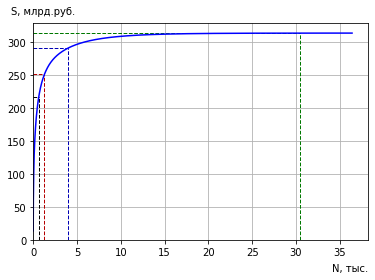

In [105]:

df_income = df[(df['year'] == 2021) & (df['quarter'] == 2)]
income_sum = df_income['taxes'].sum()
df_taxes = df_income.sort_values(by='taxes', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_taxes))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height



#df_taxes = df_taxes.sort_values(by=1, ascending=False)
# for i in range(len(df_taxes) + 1):
#     if i != 0:
#         sum += df_taxes['taxes'][i - 1] / 1e9
#     y.append(sum)    
df_taxes["taxes"] = df_taxes["taxes"].cumsum()
y = list(df_taxes["taxes"])
for i in range(len(df_taxes)):
    y[i] = y[i] / 1e9
for i in range(len(df_taxes)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
# ax.set_xlabel('N, тыс.', rotation = 'horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
A = 1275
B = 4024
C = 30483
D = 624
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.vlines(x = D/1000, ymin= 0, ymax = y[D], color='black', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = D/1000, y = y[D], color='black', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(no average salary)/AS1-ABC-taxes-2021Q2.png', format='png')
figure.savefig('./ABC(no average salary)/AS1-ABC-taxes-2021Q2.eps', format='eps')

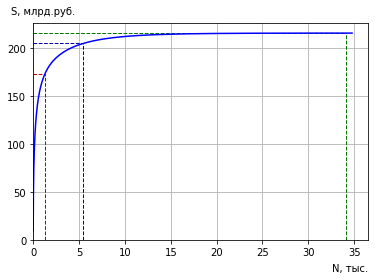

In [258]:
#налоги в бюджет 2020 год 2 квартал
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['taxes'].sum()
df_taxes = df_income.sort_values(by='taxes', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_taxes))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height



#df_taxes = df_taxes.sort_values(by=1, ascending=False)
# for i in range(len(df_taxes) + 1):
#     if i != 0:
#         sum += df_taxes['taxes'][i - 1] / 1e9
#     y.append(sum)    
df_taxes["taxes"] = df_taxes["taxes"].cumsum()
y = list(df_taxes["taxes"])
for i in range(len(df_taxes)):
    y[i] = y[i] / 1e9
for i in range(len(df_taxes)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
# ax.set_xlabel('N, тыс.', rotation = 'horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
A = 1250
B = 4210 + A
C = 28693 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

#igure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-taxes-2020Q2.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-taxes-2020Q2.eps', format='eps')

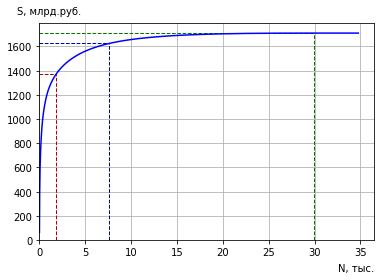

In [259]:
#доход 2020 год 2 квартал
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['income'].sum()
df_income = df_income.sort_values(by='income', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_income))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height



#df_taxes = df_taxes.sort_values(by=1, ascending=False)
# for i in range(len(df_taxes) + 1):
#     if i != 0:
#         sum += df_taxes['taxes'][i - 1] / 1e9
#     y.append(sum)    
df_income["income"] = df_income["income"].cumsum()
y = list(df_income["income"])
for i in range(len(df_income)):
    y[i] = y[i] / 1e9
for i in range(len(df_income)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
# ax.set_xlabel('N, тыс.', rotation = 'horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
A = 1792
B = 5815 + A
C = 22282 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

#igure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-taxes-2020Q2.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-income-2020Q2.eps', format='eps')

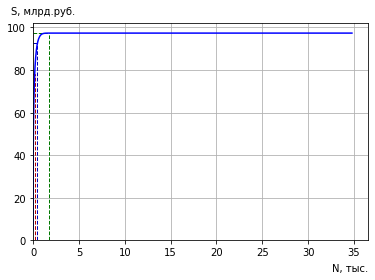

In [260]:
#доход от лицензии 2020 год 2 квартал
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['income_lic'].sum()
df_income_lic = df_income.sort_values(by='income_lic', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_income_lic))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height



#df_taxes = df_taxes.sort_values(by=1, ascending=False)
# for i in range(len(df_taxes) + 1):
#     if i != 0:
#         sum += df_taxes['taxes'][i - 1] / 1e9
#     y.append(sum)    
df_income_lic["income_lic"] = df_income_lic["income_lic"].cumsum()
y = list(df_income_lic["income_lic"])
for i in range(len(df_income_lic)):
    y[i] = y[i] / 1e9
for i in range(len(df_income)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
# ax.set_xlabel('N, тыс.', rotation = 'horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
A = 173
B = 300 + A
C = 1257 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

#igure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-taxes-2020Q2.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-income_lic-2020Q2.eps', format='eps')

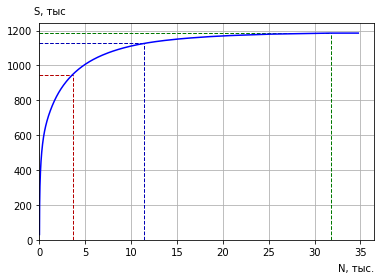

In [261]:
#количество работников 2020 год 2 квартал
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['employee_num'].sum()
df_employee_num = df_income.sort_values(by='employee_num', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_employee_num))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height



#df_taxes = df_taxes.sort_values(by=1, ascending=False)
# for i in range(len(df_taxes) + 1):
#     if i != 0:
#         sum += df_taxes['taxes'][i - 1] / 1e9
#     y.append(sum)    
df_employee_num["employee_num"] = df_employee_num["employee_num"].cumsum()
y = list(df_employee_num["employee_num"])
for i in range(len(df_employee_num)):
    y[i] = y[i] / 1e3
for i in range(len(df_income)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, тыс', rotation='horizontal')
# ax.set_xlabel('N, тыс.', rotation = 'horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
A = 3626
B = 7776 + A
C = 20436 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

#igure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-taxes-2020Q2.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABC-employee_num-2020Q2.eps', format='eps')

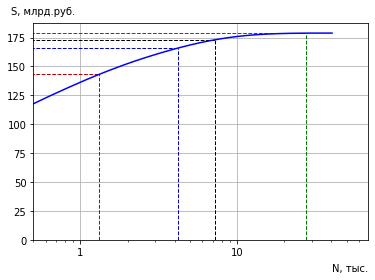

In [117]:
#2019 год 2 квартал логаррифмический масштаб налогов
df_income = df[(df['year'] == 2019) & (df['quarter'] == 2)]
income_sum = df_income['taxes'].sum()
df_taxes = df_income.sort_values(by='taxes', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_taxes))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height
df_taxes["taxes"] = df_taxes["taxes"].cumsum()
y = list(df_taxes["taxes"])
for i in range(len(df_taxes)):
    y[i] = y[i] / 1e9
for i in range(len(df_taxes)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = 1310
B = 4216
C = 27639
D = 7226
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.vlines(x = D/1000, ymin= 0, ymax = y[D], color='black', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = D/1000, y = y[D], color='black', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0.5)
plt.ylim(ymin=0)
plt.show()

figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2019/AS1-ABCD-taxes-2019Q2-log.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2019/AS1-ABCD-taxes-2019Q2-log.eps', format='eps')

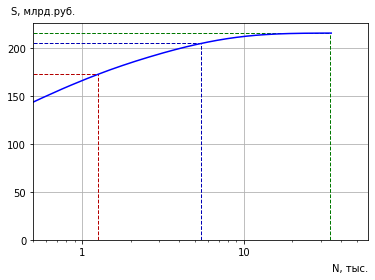

In [262]:
#2020 год 2 квартал логаррифмический масштаб налогов
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['taxes'].sum()
df_taxes = df_income.sort_values(by='taxes', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_taxes))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height
df_taxes["taxes"] = df_taxes["taxes"].cumsum()
y = list(df_taxes["taxes"])
for i in range(len(df_taxes)):
    y[i] = y[i] / 1e9
for i in range(len(df_taxes)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = 1250
B = 4210 + A
C = 28693 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0.5)
plt.ylim(ymin=0)
plt.show()

#figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2020/AS1-ABCD-taxes-2020Q2-log.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABCD-taxes-2020Q2-log.eps', format='eps')

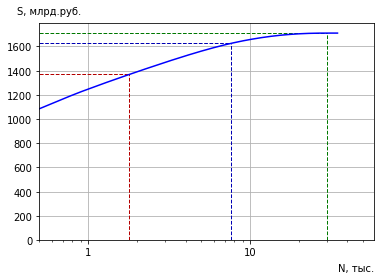

In [263]:
#2020 год 2 квартал логаррифмический масштаб доход
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['income'].sum()
df_income = df_income.sort_values(by='income', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_income))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height
df_income["income"] = df_income["income"].cumsum()
y = list(df_income["income"])
for i in range(len(df_income)):
    y[i] = y[i] / 1e9
for i in range(len(df_income)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = 1792
B = 5815 + A
C = 22282 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0.5)
plt.ylim(ymin=0)
plt.show()

#figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2020/AS1-ABCD-taxes-2020Q2-log.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABCD-income-2020Q2-log.eps', format='eps')

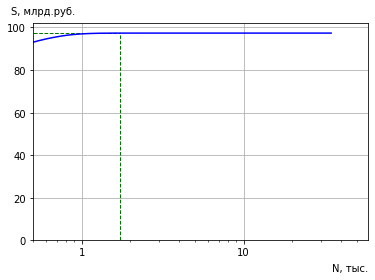

In [264]:
#2020 год 2 квартал логаррифмический масштаб доход от лицензий
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['income_lic'].sum()
df_income_lic = df_income.sort_values(by='income_lic', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_income_lic))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height
df_income_lic["income_lic"] = df_income_lic["income_lic"].cumsum()
y = list(df_income_lic["income_lic"])
for i in range(len(df_income_lic)):
    y[i] = y[i] / 1e9
for i in range(len(df_income)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = 173
B = 300 + A
C = 1257 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0.5)
plt.ylim(ymin=0)
plt.show()

#figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2020/AS1-ABCD-taxes-2020Q2-log.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABCD-income_lic-2020Q2-log.eps', format='eps')

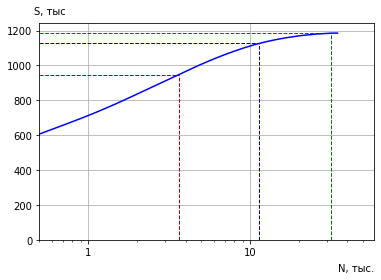

In [265]:
#2020 год 2 квартал логаррифмический масштаб количество людец
df_income = df[(df['year'] == 2020) & (df['quarter'] == 2)]
income_sum = df_income['employee_num'].sum()
df_employee_num = df_income.sort_values(by='employee_num', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_employee_num))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height
df_employee_num["employee_num"] = df_employee_num["employee_num"].cumsum()
y = list(df_employee_num["employee_num"])
for i in range(len(df_employee_num)):
    y[i] = y[i] / 1e3
for i in range(len(df_income)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, тыс', rotation='horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = 3626
B = 7776 + A
C = 20436 + B
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0.5)
plt.ylim(ymin=0)
plt.show()

#figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2020/AS1-ABCD-taxes-2020Q2-log.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/ABCD_Q2_2020_new/AS1-ABCD-employee_num-2020Q2-log.eps', format='eps')

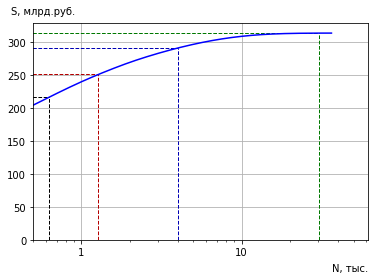

In [119]:
#2021 год 2 квартал логаррифмический масштаб налогов
df_income = df[(df['year'] == 2021) & (df['quarter'] == 2)]
income_sum = df_income['taxes'].sum()
df_taxes = df_income.sort_values(by='taxes', ascending=False)
def format_number(value, index):
    if value == 1:
        return '{:0.0f}'.format(value)
    if value == 10:
        return '{:0.0f}'.format(value)
    if value == 100:
        return '{:0.0f}'.format(value)
    if value == 1000:
        return '{:0.0f}'.format(value)
    if value == 10000:
        return '{:0.0f}'.format(value)
    if value == 100000:
        return '{:0.0f}'.format(value)
    if value == 1000000:
        return '{:0.0f}'.format(value)
    if value == 0.1:
        return '{:1.1f}'.format(value)
    if value == 0.01:
        return '{:1.2f}'.format(value)
    if value == 0.001:
        return '{:1.3f}'.format(value)

x = [i for i in range(0, len(df_taxes))]
y = []
sum = 0


left, width = 0, 1.05
bottom, height = 0, 1.05
right = left + width
top = bottom + height
df_taxes["taxes"] = df_taxes["taxes"].cumsum()
y = list(df_taxes["taxes"])
for i in range(len(df_taxes)):
    y[i] = y[i] / 1e9
for i in range(len(df_taxes)):
    x[i] = x[i] / 1e3
figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.text(right - 0.05, bottom - 0.15, 'N, тыс.',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes)
ax.yaxis.set_label_coords(0.03, 1.03)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.ticklabel_format(useOffset=False, style='plain')
ax.plot(x, y, color='blue', markersize=3.)
ax.set_xscale('log', base = 10)
ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 100000])
ax.xaxis.set_major_formatter(format_number)
A = 1275
B = 4024
C = 30483
D = 624
plt.vlines(x = A/1000, ymin= 0, ymax = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.vlines(x = B/1000, ymin= 0, ymax = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.vlines(x = C/1000, ymin= 0, ymax = y[C], color='#007800', linestyles='--', linewidth=1)
plt.vlines(x = D/1000, ymin= 0, ymax = y[D], color='black', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = A/1000, y = y[A], color='#b40000', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = B/1000, y = y[B], color='#0000b4', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = C/1000, y = y[C], color='#007800', linestyles='--', linewidth=1)
plt.hlines(xmin = 0, xmax = D/1000, y = y[D], color='black', linestyles='--', linewidth=1)
plt.grid()
plt.xlim(xmin=0.5)
plt.ylim(ymin=0)
plt.show()

figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2021/AS1-ABCD-taxes-2021Q2-log.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log/ABCD_Q2_2021/AS1-ABCD-taxes-2021Q2-log.eps', format='eps')

In [20]:
taxes_sum = df_taxes[1].sum()
i_taxes1 = 1
while (df_taxes[1][0:i_taxes1].sum() <= 0.8 * taxes_sum):
    i_taxes1 += 1
i_taxes2 = 1
while (df_taxes[1][i_taxes1:i_taxes2].sum() <= 0.15 * taxes_sum):
    i_taxes2 += 1


df_A = pd.DataFrame()
df_B = pd.DataFrame()
df_C = pd.DataFrame()
df2 = df[(df['year'] == 2021) & (df['quarter'] == 3)]
for i in tqdm(df_taxes[0][0:i_taxes1]):
    df_A = pd.concat([df_A, df2[df2['IID'] == i]])
for i in tqdm(df_taxes[0][i_taxes1:i_taxes2]):
    df_B = pd.concat([df_B, df2[df2['IID'] == i]])
for i in tqdm(df_taxes[0][i_taxes2:df_taxes[0].size]):
    df_C = pd.concat([df_C, df2[df2['IID'] == i]])
    

100%|██████████| 9559/9559 [00:13<00:00, 695.37it/s]


/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1008358071.py:66: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1008358071.py:67: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


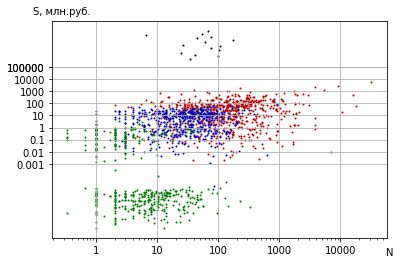

In [165]:
# отрабатываем MagicQuadrat в координатах 
# «Количество сотрудников/Доход компании» размер точки при этом от 1 pix до 10 
# (подробная постановка в Оверлифе)


#  построить квадрат X- количество сотрудников  
#  Y - доход от продажи лицензий При этом по цветам сортируем 
#  в соответствии с ABCD для параметра income (Доход)

df_income = df[(df['year'] == 2019) & (df['quarter'] == 2)]
income_sum = df_income['income'].sum()
df_income = df_income.sort_values(by='income', ascending=False)
i_income1 = 1
while (df_income['income'][0:i_income1].sum() <= 0.8 * income_sum):
    i_income1 += 1
i_income2 = i_income1 + 1
while (df_income['income'][i_income1:i_income2].sum() <= 0.15 * income_sum):
    i_income2 += 1
i_income3 = i_income2 + 1
while (df_income['income'][i_income2:].sum() <= 0.05 * income_sum):
    if list(df_income['income'])[i_income3] == 0:
        break
    i_income3 += 1

df_A = df_income[0:i_income1]
df_B = df_income[i_income1:i_income2]
df_C = df_income[i_income2:i_income3]
df_D = df_income[i_income3:]


x_A = list(df_A[column3])
y_A = list(df_A[column2])
for i in range(len(y_A)):
    y_A[i] /= 1e6
    
x_B = list(df_B[column3])
y_B = list(df_B[column2])
for i in range(len(y_B)):
    y_B[i] /= 1e6
    
x_C = list(df_C[column3])
y_C = list(df_C[column2])
for i in range(len(y_C)):
    y_C[i] /= 1e6

x_D = list(df_D[column3])
y_D = list(df_D[column2])
for i in range(len(y_D)):
    y_C[i] /= 1e6

figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x_A, y_A, s=1, color='#b40000')
ax.scatter(x_B, y_B, s=1, color='#0000b4')
ax.scatter(x_C, y_C, s=1, color='#007800')
ax.scatter(x_D, y_D, s=1, color= 'black')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/QUA-Income_lic-Staff-fromIncome-2019Q2-log2.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/QUA-Income_lic-Staff-fromIncome-2019Q2-log2.eps', format='eps')

In [164]:
Income_list_2019Q2_ABCD = [len(df_A),len(df_B),len(df_C),len(df_D)]
Income_list_2019Q2_ABCD
df_train = df[:25]
len(df_A) - len(set(df_A['IID']))
len(df_B) - len(set(df_B['IID']))
len(df_C) - len(set(df_C['IID']))
len(df_D) - len(set(df_D['IID']))
len(set(df['IID']))
df_train_update = pd.DataFrame(
{'IID': range(0, 25),	'year':range(0, 25)	,	'quarter': range(0, 25), 'employee_num':range(0, 25),	
'fot': range(0, 25)	, 'income':range(0, 25)	,	'income_lic':range(0, 25)	,	'taxesProfit':range(0, 25)	,	'taxesVAT':range(0, 25)	,
'taxesEmplSal':range(0, 25)	,	'insurance':range(0, 25)	,	'isIT':range(0, 25)	,	'isSpecialTaxRegime_insurance'	:range(0, 25)	,
'isSpecialTaxRegime_profit':range(0, 25)	,	'taxType':range(0, 25)	,	'businessSize':range(0, 25)	,	'isIP':range(0, 25)	,	
'taxes':range(0, 25)	,	'salary':range(0, 25)	})
len(set(df['IID']))
df_train_update_100 = pd.DataFrame(
{'IID': range(0, 100),	'year':range(0, 100)	,	'quarter': range(0, 100), 'employee_num':range(0, 100),	
'fot': range(0, 100)	, 'income':range(0, 100)	,	'income_lic':range(0, 100)	,	'taxesProfit':range(0, 100)	,	'taxesVAT':range(0, 100)	,
'taxesEmplSal':range(0, 100)	,	'insurance':range(0, 100)	,	'isIT':range(0, 100)	,	'isSpecialTaxRegime_insurance'	:range(0, 100)	,
'isSpecialTaxRegime_profit':range(0, 100)	,	'taxType':range(0, 100)	,	'businessSize':range(0, 100)	,	'isIP':range(0, 100)	,	
'taxes':range(0, 100)	,	'salary':range(0, 100)	})
df_train_update_100
df_D_check = df_D[df_D['income_lic'] > 0]
df_D_check[df_D_check['isIP'] == 1]
df_income[df_income['income_lic'] > 0]

[1812, 5877, 22903, 9799]

In [210]:
df_incomeQ1 = df[(df['year'] == 2020) & (df['quarter'] == 1)]
df_incomeQ2 = df[(df['year'] == 2020) & (df['quarter'] == 2)]
df_incomeQ3 = df[(df['year'] == 2020) & (df['quarter'] == 3)]
df_incomeQ4 = df[(df['year'] == 2020) & (df['quarter'] == 4)]
df_income = df_incomeQ4.copy()
common_df_income = list(df_incomeQ4['income'])
common_df_income_lic = list(df_incomeQ4['income_lic'])
# for i in range(len(df_income)):
#     common_df_income[i] = list(df_incomeQ4['income'])[i] + list(df_incomeQ1['income'])[i] + list(df_incomeQ2['income'])[i] + list(df_incomeQ3['income'])[i]
#     common_df_income_lic[i] = list(df_incomeQ4['income_lic'])[i] + list(df_incomeQ1['income_lic'])[i] + list(df_incomeQ2['income_lic'])[i] + list(df_incomeQ3['income_lic'])[i]
# df_income['income'] = common_df_income
# df_income['income_lic'] = common_df_income_lic
len(list(df_incomeQ4['income_lic'])) # 37053
# len(list(df_incomeQ3['income_lic'])) # 35890
# len(list(df_incomeQ2['income_lic'])) # 34771
# len(list(df_incomeQ1['income_lic'])) #33966

37053

In [215]:
# 1) По ID можно понять скоько компаний прекратило деятельность - 
# сколько начало - сколько просто пропустило 1 -2 квартала
# сколько начало
df_incomeQ1 = df[(df['year'] == 2020) & (df['quarter'] == 1)]
df_incomeQ2 = df[(df['year'] == 2020) & (df['quarter'] == 2)]
df_incomeQ3 = df[(df['year'] == 2020) & (df['quarter'] == 3)]
df_incomeQ4 = df[(df['year'] == 2020) & (df['quarter'] == 4)]
II_d = set(list(df_incomeQ1['IID']))
Q2_IID = list(df_incomeQ2['IID'])
Q3_IID = list(df_incomeQ3['IID'])
Q4_IID = list(df_incomeQ4['IID'])
count_IID_Q2 = 0
count_IID_Q3 = 0
count_IID_Q4 = 0
for i in range(len(Q2_IID)):
    if Q2_IID[i] not in II_d:
        count_IID_Q2 += 1
        II_d.add(Q2_IID[i])
for i in range(len(Q3_IID)):
    if Q3_IID[i] not in II_d:
        count_IID_Q3 += 1
        II_d.add(Q3_IID[i])
for i in range(len(Q4_IID)):
    if Q4_IID[i] not in II_d:
        count_IID_Q4 += 1
        II_d.add(Q4_IID[i])

In [222]:
# сколько прекратило
df_incomeQ1 = df[(df['year'] == 2020) & (df['quarter'] == 1)]
df_incomeQ2 = df[(df['year'] == 2020) & (df['quarter'] == 2)]
df_incomeQ3 = df[(df['year'] == 2020) & (df['quarter'] == 3)]
df_incomeQ4 = df[(df['year'] == 2020) & (df['quarter'] == 4)]
II_d = set(list(df_incomeQ4['IID']))
Q2_IID = list(df_incomeQ2['IID'])
Q3_IID = list(df_incomeQ3['IID'])
Q1_IID = list(df_incomeQ1['IID'])
count_IID_Q2 = 0
count_IID_Q3 = 0
count_IID_Q1 = 0
for i in range(len(Q3_IID)):
    if Q3_IID[i] not in II_d:
        count_IID_Q3 += 1
        II_d.add(Q3_IID[i])
for i in range(len(Q2_IID)):
    if Q2_IID[i] not in II_d:
        count_IID_Q2 += 1
        II_d.add(Q2_IID[i])
for i in range(len(Q1_IID)):
    if Q1_IID[i] not in II_d:
        count_IID_Q1 += 1
        II_d.add(Q1_IID[i])

In [228]:
count_IID_Q3

814

In [ ]:
df_income['income'] =  df_incomeQ1.set_index('income').add(df_incomeQ2.set_index('income'), fill_value=0).reset_index()
df_income['income_lic'] = df_incomeQ1['income_lic'] + df_incomeQ2['income_lic'] + df_incomeQ3['income_lic'] + df_incomeQ4['income_lic'] 
income_sum = df_income['income'].sum()
df_income = df_income.sort_values(by='income', ascending=False)
df_income

In [198]:
# сделать аналогичную схему за 2020 год целиком - 
# складывая квартальные значения параметров по деньгам  и взяв количество сотрудников по 4 кварталу

i_income1 = 1
while (df_income['income'][0:i_income1].sum() <= 0.8 * income_sum):
    i_income1 += 1
i_income2 = i_income1 + 1
while (df_income['income'][i_income1:i_income2].sum() <= 0.15 * income_sum):
    i_income2 += 1
i_income3 = i_income2 + 1
while (df_income['income'][i_income2:].sum() <= 0.05 * income_sum):
    if list(df_income['income'])[i_income3] == 0:
        break
    i_income3 += 1

df_A = df_income[0:i_income1]
df_B = df_income[i_income1:i_income2]
df_C = df_income[i_income2:i_income3]
df_D = df_income[i_income3:]


x_A = list(df_A[column3])
y_A = list(df_A[column2])
for i in range(len(y_A)):
    y_A[i] /= 1e6
    
x_B = list(df_B[column3])
y_B = list(df_B[column2])
for i in range(len(y_B)):
    y_B[i] /= 1e6
    
x_C = list(df_C[column3])
y_C = list(df_C[column2])
for i in range(len(y_C)):
    y_C[i] /= 1e6

x_D = list(df_D[column3])
y_D = list(df_D[column2])
for i in range(len(y_D)):
    y_C[i] /= 1e6

figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x_A, y_A, s=1, color='#b40000')
ax.scatter(x_B, y_B, s=1, color='#0000b4')
ax.scatter(x_C, y_C, s=1, color='#007800')
ax.scatter(x_D, y_D, s=1, color= 'black')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/QUA-Income_lic-Staff-fromIncome-2020-log2.png', format='png')
figure.savefig('/Users/z/Downloads/IT_Market-main/ABCD_taxes+log_billion/QUA-Income_lic-Staff-fromIncome-2020-log2.eps', format='eps')

/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1694397418.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income['income'] = df_incomeQ1['income'] + df_incomeQ2['income'] + df_incomeQ3['income'] + df_incomeQ4['income']
/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1694397418.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income['income_lic'] = df_incomeQ1['income_lic'] + df_incomeQ2['income_lic'] + df_incomeQ3['income_lic'] + df_incomeQ4['income_lic']


KeyboardInterrupt: 

/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1019857290.py:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1019857290.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


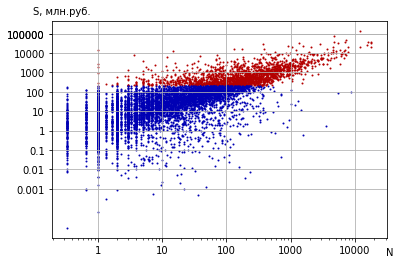

In [22]:
x_A = list(df_A[column3])
y_A = list(df_A[column1])
for i in range(len(y_A)):
    y_A[i] /= 1e6
    
x_B = list(df_B[column3])
y_B = list(df_B[column1])
for i in range(len(y_B)):
    y_B[i] /= 1e6
    
x_C = list(df_C[column3])
y_C = list(df_C[column1])
for i in range(len(y_C)):
    y_C[i] /= 1e6

figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x_A, y_A, s=1, color='#b40000')
ax.scatter(x_B, y_B, s=1, color='#0000b4')
ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log2.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log2.eps', format='eps')

In [250]:
df_incomeQ2_2020 = df[(df['year'] == 2020) & (df['quarter'] == 2)]
len(df_incomeQ2_2020[(df_incomeQ2_2020['income_lic'] > 0) & (df_incomeQ2_2020['income'] == 0)])

38

In [257]:
df_incomeQ2_2020

,IID,year,quarter,employee_num,fot,income,income_lic,taxesProfit,taxesVAT,taxesEmplSal,insurance,isIT,isSpecialTaxRegime_insurance,isSpecialTaxRegime_profit,taxType,businessSize,isIP,taxes,salary
5,2141,2020,2,166.000000,1.256610e+08,210937392.0,6605836.0,0,11731515,16349163,29269655.58,1,0,0,1,2,0,28080678,756993.854398
20,2643,2020,2,1.000000,7.260000e+04,183241.0,0.0,2455,15167,7254,21780.00,0,0,0,1,1,0,24876,72600.000000
31,4130,2020,2,230.666667,1.919379e+08,259280516.0,0.0,621670,31230056,4040012,23951767.60,1,1,0,1,2,0,35891738,832100.653960
42,5216,2020,2,2.000000,1.155000e+05,30.0,0.0,0,0,93015,34650.00,0,0,0,2,1,0,93015,57750.000000
53,8074,2020,2,5.333333,1.221733e+06,380000.0,0.0,0,0,158828,220238.85,1,0,0,2,1,0,158828,229075.010625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412472,100224369991,2020,2,1.000000,8.500000e+04,0.0,0.0,0,0,11050,23308.50,0,0,0,0,0,1,11050,85000.000000
412478,100224609426,2020,2,0.666667,4.900000e+04,0.0,0.0,0,0,6370,14700.00,0,0,0,0,1,1,6370,73500.000000
412484,100225817614,2020,2,1.000000,1.500000e+04,194250.0,0.0,0,0,1950,4065.00,0,0,0,2,1,1,1950,15000.000000
412498,100226808075,2020,2,2.000000,1.794032e+06,6316.0,0.0,0,0,233224,325094.37,0,0,0,2,1,1,233224,897015.915000


In [251]:
len(df_incomeQ2_2020[(df_incomeQ2_2020['income_lic'] == 0) & (df_incomeQ2_2020['income'] > 0)])

28197

In [252]:
len(df_incomeQ2_2020[ df_incomeQ2_2020['income'] > 0])

29889

In [253]:
len(df_incomeQ2_2020[(df_incomeQ2_2020['income_lic'] > 0) & (df_incomeQ2_2020['income'] == 0)]) + len(df_incomeQ2_2020[ df_incomeQ2_2020['income'] > 0])

29927

In [256]:
len(df_incomeQ2_2020[(df_incomeQ2_2020['income_lic'] > 0) & (df_incomeQ2_2020['income'] == 0) & (df_incomeQ2_2020['taxes'] == 0)]) + len(df_incomeQ2_2020[(df_incomeQ2_2020['income'] > 0) & (df_incomeQ2_2020['taxes'] == 0)])

407

In [255]:
34771 - len(df_incomeQ2_2020[(df_incomeQ2_2020['income_lic'] > 0) & (df_incomeQ2_2020['income'] == 0)]) - len(df_incomeQ2_2020[ df_incomeQ2_2020['income'] > 0])

4844

/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/626324827.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/626324827.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


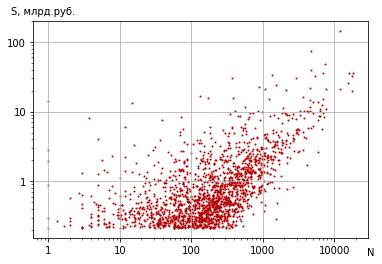

In [23]:
x_A = list(df_A[column3])
y_A = list(df_A[column1])
for i in range(len(y_A)):
    y_A[i] /= 1e9

figure, ax = plt.subplots()
ax.set_ylabel('S, млрд.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
ax.scatter(x_A, y_A, s=1, color='#b40000')
#ax.scatter(x_B, y_B, s=1, color='#0000b4')
#ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-A.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-A.eps', format='eps')

/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1818523800.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(xmin=0)
/var/folders/dx/_tnflq9j2qn_7mc4hdbb3v740000gn/T/ipykernel_12159/1818523800.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ymin=0)


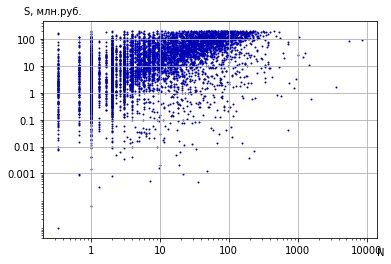

In [24]:
figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.set_xscale('log', base = 10)
ax.set_yscale('log', base = 10)
ax.set_yticks([0.001, 0.01, 0.1 , 1, 10, 100, 1000, 10000, 100000, 100000])
ax.yaxis.set_major_formatter(format_number)
ax.xaxis.set_major_formatter(format_number)
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
#ax.scatter(x_A, y_A, s=1, color='#b40000')
ax.scatter(x_B, y_B, s=1, color='#0000b4')
#ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-B.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-B.eps', format='eps')

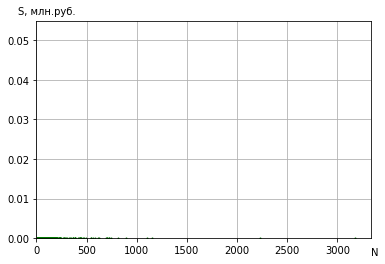

In [25]:
figure, ax = plt.subplots()
ax.set_ylabel('S, млн.руб.', rotation='horizontal')
ax.set_xlabel('N')
ax.yaxis.set_label_coords(0.03, 1.02)
ax.xaxis.set_label_coords(1.01, -0.04)
#ax.scatter(x_A, y_A, s=1, color='#b40000')
#ax.scatter(x_B, y_B, s=1, color='#0000b4')
ax.scatter(x_C, y_C, s=1, color='#007800')
plt.grid()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-С.png', format='png')
figure.savefig('./ABC(MQ)/QUA-Income-Staff-fromTaxes-2021Q3-log-С.eps', format='eps')